In [1]:
from keras.layers import Dense, Softmax, Conv2D, MaxPool2D, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from keras import optimizers
import numpy as np
from keras.utils import to_categorical
import pandas as pd

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('../input/train.csv')
print(train_df.shape)

(19935, 785)


In [3]:
X = train_df.drop(['label'], axis=1).values
Y = train_df['label']
print(X.shape, Y.shape)


(19935, 784) (19935,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(15948, 784) (15948,) (3987, 784) (3987,)


In [5]:
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')/255
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')/255
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [6]:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(15948, 28, 28, 1) (15948, 26) (3987, 28, 28, 1) (3987, 26)


In [7]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(padding='same', strides=2))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(padding='same', strides=2))
model.add(Conv2D(64, (4,4), padding='same', activation='relu'))
model.add(Conv2D(64, (4,4), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D(padding='same', strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))
rmsdrp = optimizers.rmsprop(lr=0.001, epsilon=1e-08)

model.compile( loss = "categorical_crossentropy", 
               optimizer = rmsdrp, 
               metrics=['accuracy']
             )
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       102528    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)      

In [8]:
from keras_preprocessing.image import ImageDataGenerator
data_augment = ImageDataGenerator(rotation_range=10, zoom_range=0.1,width_shift_range=0.1, height_shift_range=0.1)


In [9]:
history = model.fit_generator(data_augment.flow(X_train, Y_train, batch_size=64, ), epochs=50, steps_per_epoch=X_train.shape[0]//64, validation_data=(X_val, Y_val))

Epoch 1/50
249/249 [==============================] - 10s 40ms/step - loss: 2.7408 - accuracy: 0.2191 - val_loss: 16.1734 - val_accuracy: 0.0451
Epoch 2/50
249/249 [==============================] - 8s 31ms/step - loss: 1.1732 - accuracy: 0.6560 - val_loss: 1.4068 - val_accuracy: 0.6479
Epoch 3/50
249/249 [==============================] - 8s 31ms/step - loss: 0.8117 - accuracy: 0.7691 - val_loss: 0.5946 - val_accuracy: 0.8420
Epoch 4/50
249/249 [==============================] - 8s 31ms/step - loss: 0.6667 - accuracy: 0.8097 - val_loss: 0.8862 - val_accuracy: 0.8001
Epoch 5/50
249/249 [==============================] - 8s 31ms/step - loss: 0.6028 - accuracy: 0.8314 - val_loss: 0.4819 - val_accuracy: 0.8631
Epoch 6/50
249/249 [==============================] - 8s 31ms/step - loss: 0.5404 - accuracy: 0.8503 - val_loss: 0.3668 - val_accuracy: 0.9024
Epoch 7/50
249/249 [==============================] - 8s 31ms/step - loss: 0.5049 - accuracy: 0.8590 - val_loss: 0.4155 - val_accuracy: 0.89

In [10]:

model.save('trained_model.h5')

In [11]:
from IPython.display import FileLink
FileLink(r'trained_model.h5')

/kaggle/working/trained_model.h5

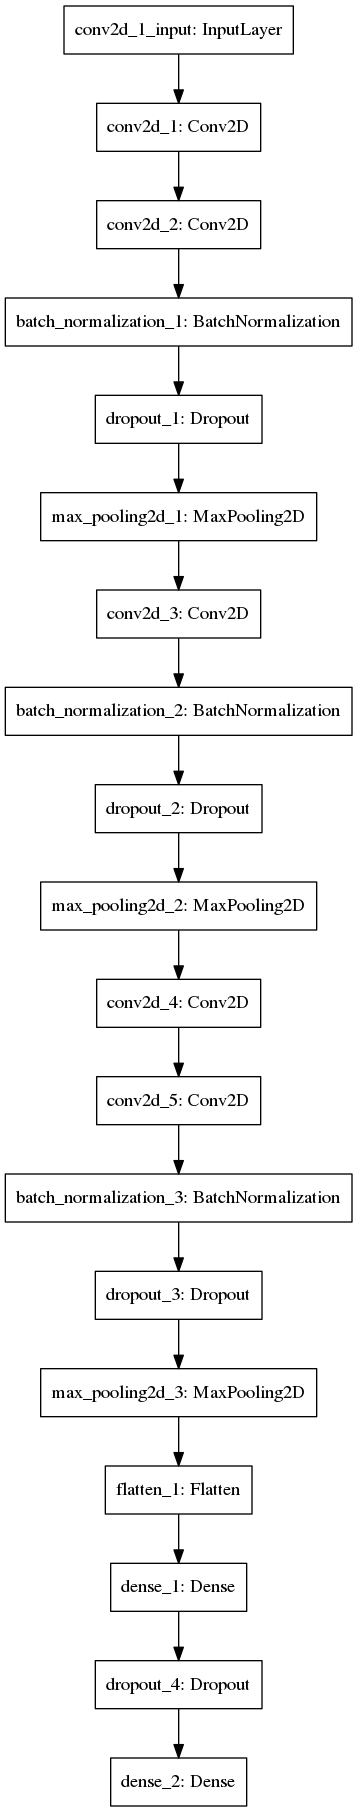

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [13]:
from IPython.display import FileLink
FileLink(r'model.png')

/kaggle/working/model.png